In [5]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 2.3 MB/s eta 0:00:17
   ---------------------------------------- 0.3/38.8 MB 3.7 MB/s eta 0:00:11
    --------------------------------------- 0.6/38.8 MB 4.8 MB/s eta 0:00:08
    --------------------------------------- 0.9/38.8 MB 5.5 MB/s eta 0:00:07
   - -------------------------------------- 1.2/38.8 MB 6.0 MB/s eta 0:00:07
   - -------------------------------------- 1.5/38.8 MB 6.0 MB/s eta 0:00:07
   - -------------------------------------- 1.9/38.8 MB 6.6 MB/s eta 0:00:06
   -- ------------------------------------- 2.2/38.8 MB 6.6 MB/s eta 0:00:06
   -- ------------------------------------- 2.9/38.8 MB 8.0 MB/s eta 0:00:05
   ----- ---------------------------------- 5.2/38.8 MB 12.8 MB/s eta 0:00:03
   ------ --------------------------------- 6.3/38.8 MB 14.9 MB/s eta 0:00:03
   ------ --------------------------------- 6.3/38.8 MB 14.9 MB/s eta 0:00:03
   


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: C:\Users\student\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
import numpy
import matplotlib.pyplot as plt
import cv2

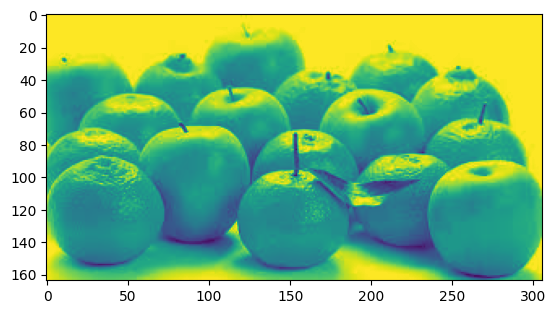

In [45]:
image = cv2.imread('./images.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image)

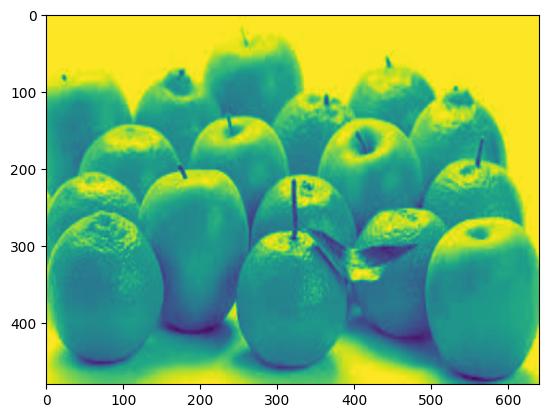

In [46]:
#Pre processing
desired_width = 640
desired_height = 480

image = cv2.resize(image, (desired_width,desired_height))
plt.imshow(image)

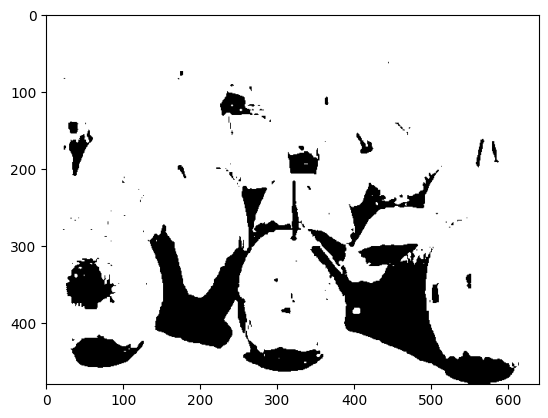

In [47]:
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binary_image, cmap='gray')

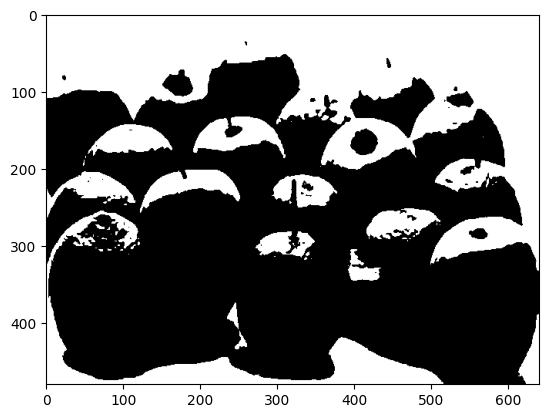

In [48]:
#Otsu's thresholding
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(binary_image,cmap='gray')

plt.imsave('./thresholded_image.jpeg', binary_image)


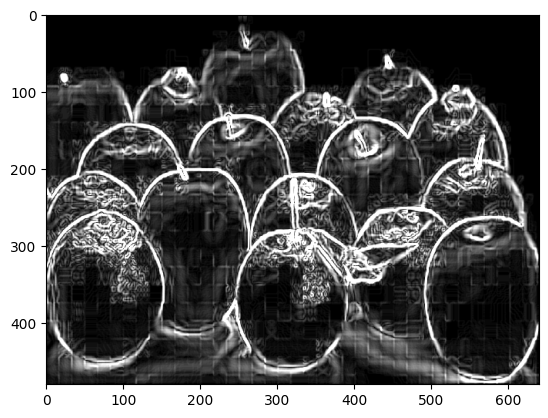

In [57]:
#Edge detection using Sobel operation
for ksize in range(1,4,2):
    sobel_image_x = cv2.Sobel(image, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=ksize)
    gradx = cv2.convertScaleAbs(sobel_image_x)

    sobel_image_y = cv2.Sobel(image, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=ksize)
    grady = cv2.convertScaleAbs(sobel_image_y)

    sobel_image = cv2.addWeighted(gradx,2,grady,2,0.5)
    plt.imshow(sobel_image, cmap='gray')

plt.imsave('./sobel_image.jpeg', sobel_image)

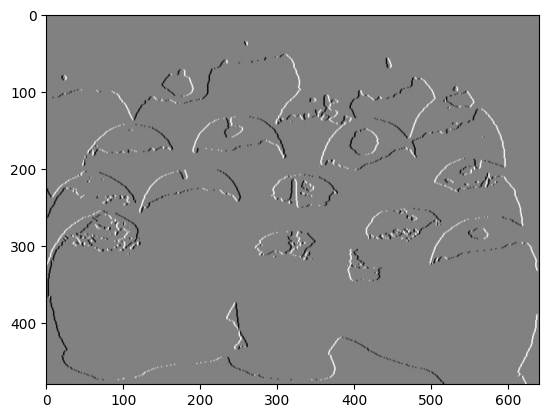

In [38]:
scharr_image = cv2.Scharr(image, ddepth=cv2.CV_32F, dx=1, dy=0)
plt.imshow(scharr_image, cmap='gray')

In [41]:
# Find contours
contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(image, contours, -1, (0,255,0), 20)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [59]:
import cv2
import numpy as np

def canny_edge_detector(image_path):
    # Step 1: Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Step 2: Apply Gaussian Blur
    blurred_img = cv2.GaussianBlur(img, (5, 5), 1.4)
    
    # Step 3: Compute gradients
    gx = cv2.Sobel(blurred_img, cv2.CV_64F, 1, 0, ksize=3)
    gy = cv2.Sobel(blurred_img, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(gx**2 + gy**2)
    angle = np.arctan2(gy, gx)
    
    # Step 4: Non-Maximum Suppression
    nms = np.zeros_like(magnitude)
    angle = angle * 180. / np.pi
    angle[angle < 0] += 180
    
    for i in range(1, magnitude.shape[0] - 1):
        for j in range(1, magnitude.shape[1] - 1):
            try:
                q = 255
                r = 255
                
                # Angle 0
                if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                    q = magnitude[i, j + 1]
                    r = magnitude[i, j - 1]
                # Angle 45
                elif 22.5 <= angle[i, j] < 67.5:
                    q = magnitude[i + 1, j - 1]
                    r = magnitude[i - 1, j + 1]
                # Angle 90
                elif 67.5 <= angle[i, j] < 112.5:
                    q = magnitude[i + 1, j]
                    r = magnitude[i - 1, j]
                # Angle 135
                elif 112.5 <= angle[i, j] < 157.5:
                    q = magnitude[i - 1, j - 1]
                    r = magnitude[i + 1, j + 1]
                
                if (magnitude[i, j] >= q) and (magnitude[i, j] >= r):
                    nms[i, j] = magnitude[i, j]
                else:
                    nms[i, j] = 0
            except IndexError as e:
                pass
    
    # Step 5: Double Thresholding
    high_threshold = nms.max() * 0.1
    low_threshold = high_threshold * 0.5
    
    res = np.zeros_like(nms)
    strong = np.int32(255)
    weak = np.int32(75)
    
    strong_i, strong_j = np.where(nms >= high_threshold)
    weak_i, weak_j = np.where((nms <= high_threshold) & (nms >= low_threshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    # Step 6: Edge Tracking by Hysteresis
    for i in range(1, res.shape[0] - 1):
        for j in range(1, res.shape[1] - 1):
            if (res[i, j] == weak):
                if ((res[i + 1, j - 1] == strong) or (res[i + 1, j] == strong) or (res[i + 1, j + 1] == strong)
                        or (res[i, j - 1] == strong) or (res[i, j + 1] == strong)
                        or (res[i - 1, j - 1] == strong) or (res[i - 1, j] == strong) or (res[i - 1, j + 1] == strong)):
                    res[i, j] = strong
                else:
                    res[i, j] = 0
    
    return res

# Example usage
edges = canny_edge_detector('./images.jpeg')
cv2.imshow('Canny Edge Detection', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()
